# Tutorial 1A: Cylinder Z-stack with GenCoMo

## Simple Cylindrical Morphology

This tutorial focuses on creating, analyzing, and working with **cylindrical z-stack morphologies** in GenCoMo. The cylinder is the simplest neuronal geometry and serves as a foundation for understanding z-stack operations.

### What you'll learn:
1. Creating cylindrical morphologies as z-stack binary arrays
2. Visualizing cylindrical structures with volume rendering
3. Analyzing geometric properties of cylindrical morphologies
4. Managing z-stack data with file I/O operations
5. Understanding the z-stack format advantages

### Key Concepts:
- **Cylindrical geometry**: Simple axon or dendrite representation
- **Z-stack format**: Binary 3D arrays where 1=inside neuron, 0=outside
- **Volume rendering**: 3D visualization of binary data
- **Morphometric analysis**: Quantitative shape measurements

### Why Start with Cylinders?
- **Simple geometry**: Easy to understand and validate
- **Common morphology**: Represents axons and straight dendrites
- **Foundation**: Building block for more complex shapes
- **Validation**: Known analytical properties for verification

## 1. Import Required Libraries and Setup

First, let's import all the necessary libraries for working with cylindrical z-stacks.

In [1]:
# Import core scientific libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Import GenCoMo package components
import sys
sys.path.append('../')  # Add parent directory to path

# Core GenCoMo modules for cylindrical z-stacks
from gencomo import (
    # Z-stack functions (primary format)
    create_cylinder_zstack,
    visualize_zstack_3d, 
    save_zstack_data, 
    load_zstack_data,
    analyze_zstack_properties,
    # Core modules
    MeshProcessor
)

print("✅ All libraries imported successfully!")
print("📦 GenCoMo version: 0.1.0")
print("🟢 Ready for cylindrical z-stack modeling!")

# Configure plotting
plt.style.use('default')
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
✅ All libraries imported successfully!
📦 GenCoMo version: 0.1.0
🟢 Ready for cylindrical z-stack modeling!
✅ All libraries imported successfully!
📦 GenCoMo version: 0.1.0
🟢 Ready for cylindrical z-stack modeling!


## 2. Creating Cylindrical Z-stack Morphology

Let's create a cylindrical neuron morphology using GenCoMo's z-stack format. This represents a simple axon or straight dendrite segment.

In [2]:
# Create cylindrical z-stack morphology
print("🟢 Creating cylindrical z-stack morphology...")
print()

# Simple cylindrical morphology parameters
cylinder_params = {
    'length': 20,        # 20 μm length
    'radius': 5,         # 5 μm radius
    'z_resolution': 0.5, # 0.5 μm per z-slice
    'xy_resolution': 0.5 # 0.5 μm per xy-pixel
}

# Create the z-stack
cylinder_zstack, cylinder_meta = create_cylinder_zstack(**cylinder_params)

print(f"✓ Cylinder z-stack created: {cylinder_zstack.shape} voxels")
print(f"✓ Dimensions (z,y,x): {cylinder_zstack.shape}")
print(f"✓ Voxel count: {np.sum(cylinder_zstack):,} inside neuron")
print(f"✓ Fill ratio: {np.sum(cylinder_zstack)/cylinder_zstack.size:.3f}")
print()
print("📋 Metadata:")
for key, value in cylinder_meta.items():
    print(f"   • {key}: {value}")
print()
print("🎯 Cylindrical z-stack ready for analysis!")

🟢 Creating cylindrical z-stack morphology...

✓ Cylinder z-stack created: (48, 28, 28) voxels
✓ Dimensions (z,y,x): (48, 28, 28)
✓ Voxel count: 12,000 inside neuron
✓ Fill ratio: 0.319

📋 Metadata:
   • morphology_type: cylinder
   • z_resolution: 0.5
   • xy_resolution: 0.5
   • x_coords: [-7.         -6.48148148 -5.96296296 -5.44444444 -4.92592593 -4.40740741
 -3.88888889 -3.37037037 -2.85185185 -2.33333333 -1.81481481 -1.2962963
 -0.77777778 -0.25925926  0.25925926  0.77777778  1.2962963   1.81481481
  2.33333333  2.85185185  3.37037037  3.88888889  4.40740741  4.92592593
  5.44444444  5.96296296  6.48148148  7.        ]
   • y_coords: [-7.         -6.48148148 -5.96296296 -5.44444444 -4.92592593 -4.40740741
 -3.88888889 -3.37037037 -2.85185185 -2.33333333 -1.81481481 -1.2962963
 -0.77777778 -0.25925926  0.25925926  0.77777778  1.2962963   1.81481481
  2.33333333  2.85185185  3.37037037  3.88888889  4.40740741  4.92592593
  5.44444444  5.96296296  6.48148148  7.        ]
   • z_coord

## 3. Visualizing the Cylindrical Z-stack

GenCoMo provides 3D volume rendering tools to visualize the cylindrical morphology interactively.

In [3]:
# Visualize the cylindrical z-stack in 3D
print("🎨 Creating 3D visualization of cylindrical z-stack...")

# Create interactive 3D plot
fig_cylinder = visualize_zstack_3d(
    cylinder_zstack, 
    metadata=cylinder_meta,
)

# Display the plot
fig_cylinder.show()

print("✓ 3D visualization complete!")
print("💡 Interact with the plot: rotate, zoom, and explore the cylindrical structure")

🎨 Creating 3D visualization of cylindrical z-stack...


✓ 3D visualization complete!
💡 Interact with the plot: rotate, zoom, and explore the cylindrical structure


## 4. Analyzing Cylindrical Properties

Let's analyze the morphometric properties of our cylindrical z-stack to understand its geometric characteristics.

In [4]:
# Analyze cylindrical z-stack properties
print("🔬 Analyzing cylindrical z-stack properties...")
print()

# Perform detailed analysis
cylinder_props = analyze_zstack_properties(cylinder_zstack, cylinder_meta)

# Debug: show available keys
print("Available keys in cylinder_props:")
for key in cylinder_props.keys():
    print(f"   • {key}: {type(cylinder_props[key])}")
print()

print("📊 Cylindrical Z-stack Analysis Results:")
print("=" * 45)
print(f"📏 Volume: {cylinder_props['volume']:.1f} μm³")
print(f"📐 Surface area: {cylinder_props['surface_area']:.1f} μm²")
print(f"📦 Bounding box: {cylinder_props['bounding_box']}")
print(f"🔗 Connected components: {cylinder_props['connected_components']}")
print(f"🧮 Euler number: {cylinder_props['euler_number']}")
print()

# Theoretical validation for cylinder
theoretical_volume = np.pi * (cylinder_params['radius']**2) * cylinder_params['length']
theoretical_surface = 2 * np.pi * cylinder_params['radius'] * cylinder_params['length'] + 2 * np.pi * (cylinder_params['radius']**2)

print("🧪 Theoretical vs. Measured Comparison:")
print(f"   Volume - Theoretical: {theoretical_volume:.1f} μm³, Measured: {cylinder_props['volume']:.1f} μm³")
print(f"   Surface - Theoretical: {theoretical_surface:.1f} μm², Measured: {cylinder_props['surface_area']:.1f} μm²")
print()
print("🎯 Analysis complete! These properties validate the cylindrical geometry.")

🔬 Analyzing cylindrical z-stack properties...

Available keys in cylinder_props:
   • shape: <class 'tuple'>
   • total_voxels: <class 'int'>
   • neuron_voxels: <class 'numpy.uint64'>
   • volume: <class 'numpy.float64'>
   • surface_area: <class 'float'>
   • z_resolution: <class 'float'>
   • xy_resolution: <class 'float'>
   • bounds: <class 'dict'>
   • morphology_type: <class 'str'>
   • fill_ratio: <class 'numpy.float64'>
   • z_extent: <class 'float'>
   • xy_extent: <class 'dict'>
   • connected_components: <class 'int'>
   • euler_number: <class 'int'>
   • bounding_box: <class 'list'>
   • slice_areas: <class 'list'>
   • max_cross_section: <class 'numpy.float64'>
   • min_cross_section: <class 'numpy.float64'>

📊 Cylindrical Z-stack Analysis Results:
📏 Volume: 1500.0 μm³
📐 Surface area: 644.0 μm²
📦 Bounding box: [0, 14.0, 0, 14.0, 0, 24.0]
🔗 Connected components: 1
🧮 Euler number: 2

🧪 Theoretical vs. Measured Comparison:
   Volume - Theoretical: 1570.8 μm³, Measured: 1500.

## 5. Z-stack Data Management

Let's save and load the cylindrical z-stack data to demonstrate file I/O operations.

In [7]:
# Save and load cylindrical z-stack data
print("💾 Cylindrical z-stack file I/O operations...")
print()

# Enhanced metadata for cylinder
enhanced_metadata = {
    **cylinder_meta,
    'morphology_type': 'cylinder',
    'geometry': 'simple_axon',
    'tutorial': '01a_cylinder_zstack',
    'created_with': 'GenCoMo v0.1.0'
}

# Save to compressed .npz format
filename = 'cylinder_morphology.npz'
save_zstack_data(cylinder_zstack, metadata=enhanced_metadata, filepath=filename)
print(f"✓ Saved cylindrical z-stack to '{filename}'")

# Load z-stack data back
loaded_zstack, loaded_meta = load_zstack_data(filename)
print(f"✓ Loaded z-stack: {loaded_zstack.shape} voxels")
print()

# Verify data integrity
data_matches = np.array_equal(cylinder_zstack, loaded_zstack)
print(f"🔍 Data integrity check: {'✓ PASSED' if data_matches else '✗ FAILED'}")

print("\n📋 Saved metadata:")
for key, value in loaded_meta.items():
    print(f"   • {key}: {value}")
print()
print("🎯 File I/O operations complete!")

💾 Cylindrical z-stack file I/O operations...

✓ Saved cylindrical z-stack to 'cylinder_morphology.npz'
✓ Loaded z-stack: (48, 28, 28) voxels

🔍 Data integrity check: ✓ PASSED

📋 Saved metadata:
   • morphology_type: cylinder
   • z_resolution: 0.5
   • xy_resolution: 0.5
   • x_coords: [-7.         -6.48148148 -5.96296296 -5.44444444 -4.92592593 -4.40740741
 -3.88888889 -3.37037037 -2.85185185 -2.33333333 -1.81481481 -1.2962963
 -0.77777778 -0.25925926  0.25925926  0.77777778  1.2962963   1.81481481
  2.33333333  2.85185185  3.37037037  3.88888889  4.40740741  4.92592593
  5.44444444  5.96296296  6.48148148  7.        ]
   • y_coords: [-7.         -6.48148148 -5.96296296 -5.44444444 -4.92592593 -4.40740741
 -3.88888889 -3.37037037 -2.85185185 -2.33333333 -1.81481481 -1.2962963
 -0.77777778 -0.25925926  0.25925926  0.77777778  1.2962963   1.81481481
  2.33333333  2.85185185  3.37037037  3.88888889  4.40740741  4.92592593
  5.44444444  5.96296296  6.48148148  7.        ]
   • z_coords: [

## 6. Cross-sectional Analysis

Let's examine cross-sections of the cylinder to understand its internal structure.

🔍 Cross-sectional analysis of cylindrical z-stack...

✓ Cross-section 1 (z=12):
   • Shape: (28, 28)
   • Area: 300 pixels (75.0 μm²)
✓ Cross-section 2 (z=24):
   • Shape: (28, 28)
   • Area: 300 pixels (75.0 μm²)
✓ Cross-section 3 (z=36):
   • Shape: (28, 28)
   • Area: 300 pixels (75.0 μm²)

🧪 Theoretical cross-sectional area: 78.5 μm²



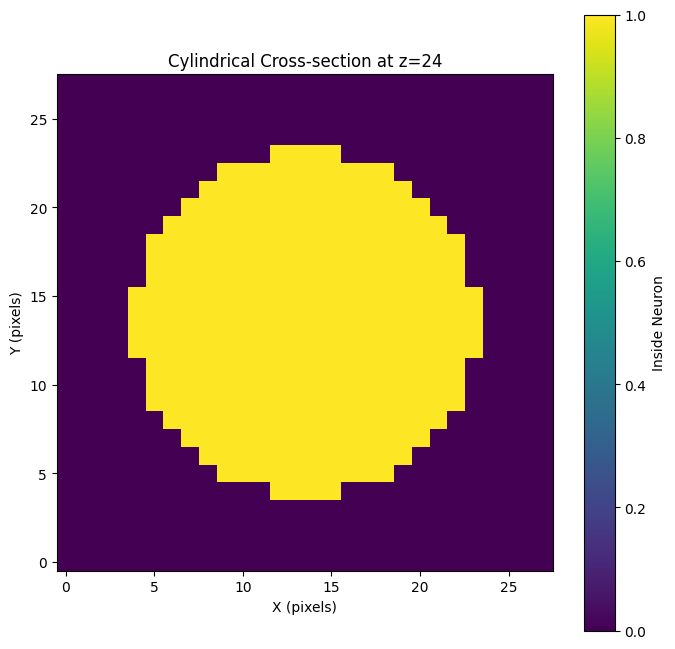

🎯 Cross-sectional analysis complete!


In [8]:
# Cross-sectional analysis of cylindrical z-stack
print("🔍 Cross-sectional analysis of cylindrical z-stack...")
print()

# Extract cross-sections at different positions
z_positions = [cylinder_zstack.shape[0]//4, cylinder_zstack.shape[0]//2, 3*cylinder_zstack.shape[0]//4]

for i, z_pos in enumerate(z_positions):
    cross_section = cylinder_zstack[z_pos, :, :]
    area_pixels = np.sum(cross_section)
    area_um2 = area_pixels * (cylinder_params['xy_resolution']**2)
    
    print(f"✓ Cross-section {i+1} (z={z_pos}):")
    print(f"   • Shape: {cross_section.shape}")
    print(f"   • Area: {area_pixels} pixels ({area_um2:.1f} μm²)")

print()

# Theoretical cross-sectional area
theoretical_area = np.pi * (cylinder_params['radius']**2)
print(f"🧪 Theoretical cross-sectional area: {theoretical_area:.1f} μm²")
print()

# Visualize middle cross-section
mid_z = cylinder_zstack.shape[0] // 2
mid_section = cylinder_zstack[mid_z, :, :]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(mid_section, cmap='viridis', origin='lower')
ax.set_title(f'Cylindrical Cross-section at z={mid_z}')
ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
plt.colorbar(ax.imshow(mid_section, cmap='viridis', origin='lower'), ax=ax, label='Inside Neuron')
plt.show()

print("🎯 Cross-sectional analysis complete!")

## 7. Summary and Next Steps

You've successfully created, analyzed, and manipulated a cylindrical z-stack morphology with GenCoMo!

In [ ]:
# Cylindrical z-stack tutorial summary
print("🟢 Cylindrical Z-stack Tutorial Complete!")
print("=" * 50)
print()
print("✅ What we accomplished:")
print("   1. Created cylindrical z-stack morphology")
print("   2. Visualized structure with 3D volume rendering")
print("   3. Analyzed geometric properties")
print("   4. Validated against theoretical values")
print("   5. Performed file I/O operations")
print("   6. Examined cross-sectional structure")
print()
print("🧠 Key insights about cylindrical morphologies:")
print("   • Simple geometry with known analytical properties")
print("   • Foundation for more complex neuronal shapes")
print("   • Direct representation of axons and straight dendrites")
print("   • Excellent for validation and testing")
print()
print("🚀 Next steps:")
print("   • Explore Y-shaped branching: '01b_y_branch_zstack.ipynb'")
print("   • Study complex topology: '01c_hole_topology_zstack.ipynb'")
print("   • Build compartmental models from z-stacks")
print("   • Load your own imaging data")
print()
print("📖 Ready to explore more complex morphologies with GenCoMo!")

---

**🎉 Congratulations!** You've mastered cylindrical z-stack morphologies in GenCoMo.

**Key takeaways:**
- Cylindrical geometries are the foundation of neuronal modeling
- Z-stack format provides precise volumetric representation
- Theoretical validation confirms accuracy of digital morphologies
- Cross-sectional analysis reveals internal structure
- File I/O enables data sharing and reproducibility

**Ready for more complexity?** Continue with Y-shaped branching morphologies!

---